In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv/train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
(df['is_duplicate'].value_counts()*100)/df.shape[0]

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64

In [8]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [9]:
import numpy as np

In [10]:
total_question = (pd.concat([df['qid1'], df['qid2']], axis=0).reset_index(drop=True))
print(f"Number of unique questions {total_question.nunique()}")
x = total_question.value_counts() > 1
print(f"Number of questions that were repeated {x[x].shape[0]}")

Number of unique questions 537933
Number of questions that were repeated 111780


In [11]:
import re
import inflect
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess(q):
    q = str(q).lower().strip()
    
    # Replace special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # Remove '[math]' occurrences
    q = q.replace('[math]', '')
    
    # Replace numbers with abbreviations (b for billion, m for million, etc.)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)
    q = ' '.join(q_decontracted)

    # Removing HTML tags
    q = BeautifulSoup(q, 'html.parser').get_text()
    
    # Remove punctuations
    q = re.sub(r'\W', ' ', q).strip()
    
    # Stopwords Removal
    stop_words = set(stopwords.words('english'))
    q = ' '.join([word for word in q.split() if word not in stop_words])
    
    # Convert numbers to words
    p = inflect.engine()
    q = ' '.join([p.number_to_words(word) if word.isdigit() else word for word in q.split()])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    q = ' '.join([lemmatizer.lemmatize(word) for word in q.split()])
    
    return q


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
new_df = df.sample(50000,random_state=2)

In [13]:
new_df.shape

(50000, 6)

In [14]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\dell\AppData\Local\Temp\ipykernel_20004\17621680.py:163: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q, 'html.parser').get_text()


In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...,1
115086,115086,187729,187730,poor want invest,quite poor want rich,0
327711,327711,454161,454162,india live abroad met guy france party want date,e thapar university thapar university institut...,0
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0


In [16]:
new_df.drop(columns =['id','qid1', 'qid2'], inplace =True)

In [17]:
new_df.head()
print(new_df.shape)

(50000, 3)


In [18]:
new_df.duplicated().sum()

np.int64(394)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_duplicate', ylabel='count'>

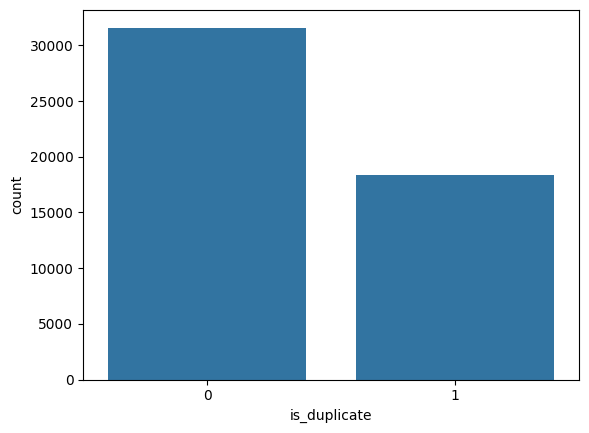

In [20]:
sns.countplot(x=new_df.is_duplicate)

In [21]:
new_df.drop_duplicates(inplace=True)

In [22]:
new_df.shape

(49606, 3)

<Axes: xlabel='is_duplicate', ylabel='count'>

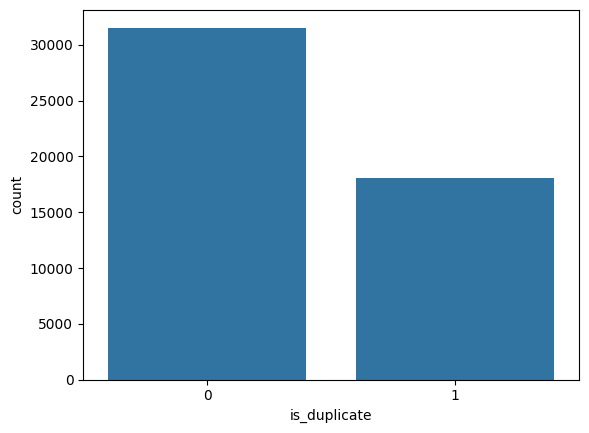

In [23]:
sns.countplot(x=new_df.is_duplicate)

In [24]:
new_df['is_duplicate'].value_counts()


is_duplicate
0    31555
1    18051
Name: count, dtype: int64

In [25]:
(new_df['is_duplicate'].value_counts()*100)/new_df.shape[0]


is_duplicate
0    63.611257
1    36.388743
Name: count, dtype: float64

In [26]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [27]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...,1,53,54,8,8
115086,poor want invest,quite poor want rich,0,16,20,3,4
327711,india live abroad met guy france party want date,e thapar university thapar university institut...,0,48,90,9,11
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,6,12
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,4,5


In [28]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [29]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...,1,53,54,8,8,7
115086,poor want invest,quite poor want rich,0,16,20,3,4,2
327711,india live abroad met guy france party want date,e thapar university thapar university institut...,0,48,90,9,11,0
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,6,12,0
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,4,5,3


In [30]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))



In [31]:
word_count = new_df.apply(total_words, axis=1)

In [32]:
new_df['word_share'] = round(new_df['word_common']/word_count,2)
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_share
398782,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...,1,53,54,8,8,7,0.44
115086,poor want invest,quite poor want rich,0,16,20,3,4,2,0.29
327711,india live abroad met guy france party want date,e thapar university thapar university institut...,0,48,90,9,11,0,0.00
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,6,12,0,0.00
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,4,5,3,0.33


In [33]:
def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 
    token_features = [0.0]*4
      # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    q1_words = set([word for word in q1_tokens ])
    q2_words = set([word for word in q2_tokens ])

    common_word_count = len(q1_words.intersection(q2_words))
    token_features[0] = common_word_count / (len(q1_words) + SAFE_DIV)
    token_features[1] = common_word_count / (len(q2_words) + SAFE_DIV)

    token_features[2] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[3] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [34]:
token_features = new_df.apply(fetch_token_features, axis=1)

In [35]:
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[2], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[3], token_features))

In [36]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_share,cwc_min,cwc_max,last_word_eq,first_word_eq
398782,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...,1,53,54,8,8,7,0.44,0.874989,0.874989,1.0,1.0
115086,poor want invest,quite poor want rich,0,16,20,3,4,2,0.29,0.666644,0.499988,0.0,0.0
327711,india live abroad met guy france party want date,e thapar university thapar university institut...,0,48,90,9,11,0,0.00,0.000000,0.000000,0.0,0.0
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,6,12,0,0.00,0.000000,0.000000,0.0,0.0
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,4,5,3,0.33,0.749981,0.599988,1.0,0.0


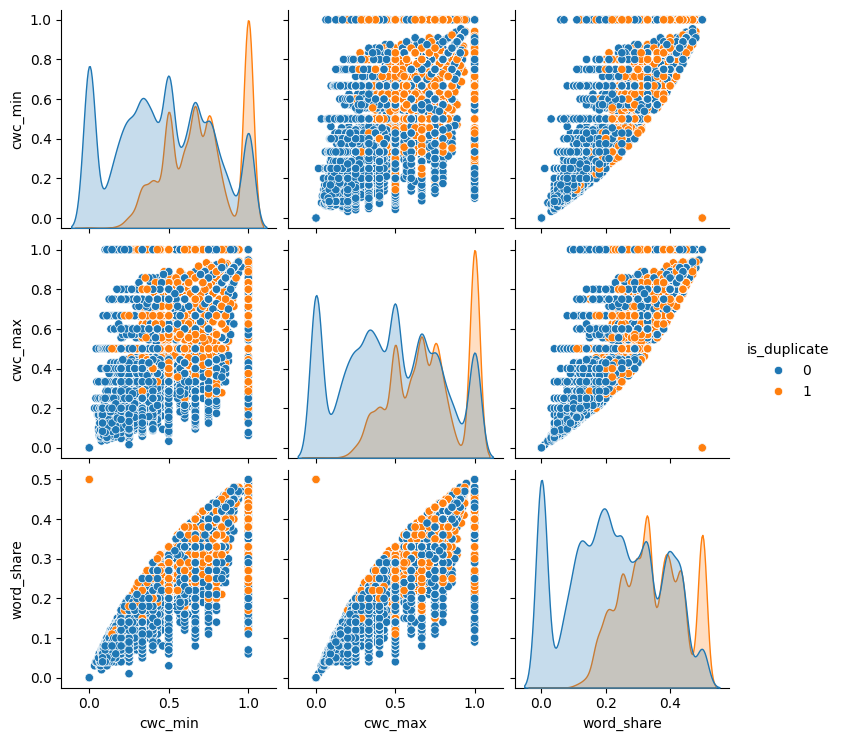

In [37]:
sns.pairplot(new_df[['cwc_min', 'cwc_max', 'word_share', 'is_duplicate']],hue='is_duplicate')

In [38]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [39]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

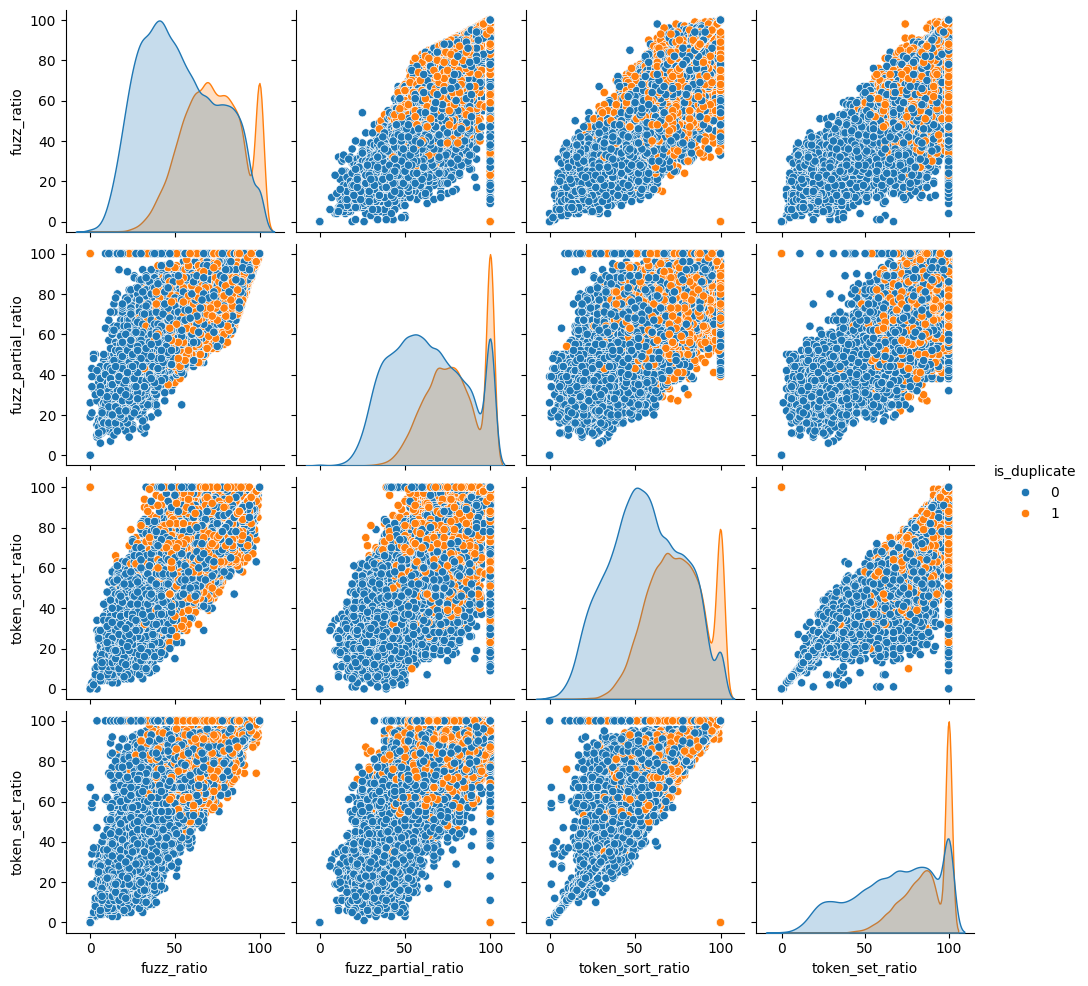

In [40]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [41]:
new_df.shape

(49606, 17)

In [42]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['q1_len', 'q2_len',
       'q1_num_words', 'q2_num_words', 'word_common', 'word_share',
       'last_word_eq', 'first_word_eq', 'cwc_min', 'cwc_max', 'fuzz_ratio',
       'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']])
y = new_df['is_duplicate'].values

In [43]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,best marketing automation tool small mid size ...,best marketing automation tool small mid sized...
115086,poor want invest,quite poor want rich
327711,india live abroad met guy france party want date,e thapar university thapar university institut...
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy


In [44]:
final_df = new_df.drop(columns=['question1','question2'])
print(final_df.shape)
final_df.head()

(49606, 15)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_share,cwc_min,cwc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,53,54,8,8,7,0.44,0.874989,0.874989,1.0,1.0,99,98,99,99
115086,0,16,20,3,4,2,0.29,0.666644,0.499988,0.0,0.0,61,73,50,72
327711,0,48,90,9,11,0,0.00,0.000000,0.000000,0.0,0.0,26,40,30,30
367788,0,33,81,6,12,0,0.00,0.000000,0.000000,0.0,0.0,16,31,26,26
151235,0,30,32,4,5,3,0.33,0.749981,0.599988,1.0,0.0,74,79,58,75


In [45]:
new_df.shape

(49606, 17)

In [46]:
new_df.to_csv('new_df.csv')